## FASTKDE

An efficient kernel density estimation for approximating multivariate distributions.

Reference: https://github.com/LBL-EESA/fastkde

**Introduction to FastKDE**

FastKDE is a computational tool designed to perform **fast and adaptive kernel density estimation (KDE)** for one-dimensional and multi-dimensional data. Traditional KDE methods can be computationally intensive, especially with large datasets or higher-dimensional data. FastKDE addresses these limitations by employing efficient algorithms and adaptive techniques to provide accurate density estimates quickly.

---

**Core Concepts**

### **1. Kernel Density Estimation (KDE)**

- **Definition:** KDE is a non-parametric method to estimate the probability density function (PDF) of a random variable based on a finite data sample.
  
- **Standard KDE Formula:**

  $$
  \hat{f}(x) = \frac{1}{n h} \sum_{i=1}^n K\left( \frac{x - x_i}{h} \right)
  $$

  - $ \hat{f}(x) $: Estimated density at point $ x $
  - $ n $: Number of data points
  - $ h $: Bandwidth (smoothing parameter)
  - $ K $: Kernel function (e.g., Gaussian)

- **Limitations of Standard KDE:**
  - **Computational Cost:** $ O(n) $ computations per evaluation point, which becomes costly for large $ n $.
  - **Fixed Bandwidth:** May not capture varying data densities effectively.
  - **Grid-Based Methods:** Evaluating the KDE on a grid can be inefficient in higher dimensions.

### **2. FastKDE's Approach**

FastKDE enhances standard KDE through:

- **Adaptive Bandwidth Selection:**
  - **Variable Bandwidths:** Adjusts the bandwidth locally based on data density to capture features at different scales.
  - **Sheather-Jones Method:** Often used for optimal bandwidth selection in standard KDE; FastKDE extends this adaptively.

- **Efficient Computation via FFT:**
  - **Fast Fourier Transform (FFT):** Utilizes FFTs to compute convolutions efficiently, reducing computational complexity.
  - **Grid-Based Evaluation:** Evaluates the density on an adaptive grid that concentrates points where the data density is high.

- **Data-Driven Mesh Generation:**
  - **Adaptive Mesh:** Creates a non-uniform grid that places more evaluation points where the data are denser.
  - **Quadtrees/Octrees:** In higher dimensions, spatial partitioning structures like quadtrees (2D) or octrees (3D) are used to manage the adaptive grid.

- **Boundary Handling:**
  - **Reflection Methods:** Deals with boundary bias by reflecting data points near the boundaries.
  - **Edge Correction:** Adjusts the KDE near the edges to improve estimation accuracy.

---

**Detailed Explanation of FastKDE Mechanics**

### **1. Adaptive Bandwidth Selection**

- **Purpose:** To allow the KDE to be sensitive to local data structures.
- **Method:**
  - **Pilot Density Estimate:** Computes an initial density estimate using a standard KDE with a global bandwidth.
  - **Bandwidth Adjustment:** Calculates local bandwidths based on the pilot estimate, typically inversely proportional to the square root of the local density.
    $$
    h(x) = \frac{h_0}{\sqrt{\hat{f}_{\text{pilot}}(x)}}
    $$
  - **Result:** Smaller bandwidths in high-density regions (capturing fine details) and larger bandwidths in low-density regions (smoothing noise).

### **2. Efficient Computation Using FFT**

- **Convolution Interpretation:**
  - The KDE can be seen as a convolution of the data sample with the kernel function.
  - **Convolution Theorem:** Allows the convolution to be computed in the frequency domain:
    $$
    \text{KDE}(x) = \mathcal{F}^{-1} [ \mathcal{F}\{ \text{Data Histogram} \} \cdot \mathcal{F}\{ \text{Kernel} \} ]
    $$
    - $ \mathcal{F} $ denotes the Fourier Transform.
- **Advantages:**
  - **Reduced Complexity:** FFT reduces the computational complexity from $ O(n^2) $ to $ O(n \log n) $.
  - **Scalability:** More efficient for large datasets.

### **3. Adaptive Grid Generation**

- **Goal:** To focus computational resources on regions where they are most needed.
- **Process:**
  - **Data Partitioning:** Divides the data space into bins or cells, with sizes adapted based on data density.
  - **Mesh Refinement:** Iteratively refines the grid in regions where the density estimate changes rapidly.
  - **Grid Points:** Places more grid points where the data density is higher.

- **Implementation:**
  - **Quadtrees (2D) / Octrees (3D):**
    - **Hierarchical Structure:** Divides the space recursively into smaller cells.
    - **Leaf Nodes:** Represent regions where the density estimate meets a certain criterion (e.g., variance threshold).

### **4. Multivariate Density Estimation**

- **Challenges:**
  - **Curse of Dimensionality:** Computational and data requirements grow exponentially with the number of dimensions.
- **FastKDE's Solution:**
  - **Dimensionality Reduction Techniques:**
    - **Principal Component Analysis (PCA):** Rotates the data to align with the directions of greatest variance, potentially reducing dimensions.
  - **Product Kernels:**
    - Uses separable kernels to simplify computations.
    - **Kernel Function:** Product of one-dimensional kernels:
      $$
      K(\mathbf{x}) = \prod_{i=1}^d K(x_i)
      $$
  - **Adaptive Bandwidths in Each Dimension:**
    - Bandwidths can vary not only spatially but also across dimensions.

---

**Advantages of FastKDE**

1. **Speed:**
   - **Efficient Algorithms:** FFT and adaptive grids reduce computation time significantly.
   - **Scalable:** Handles large datasets effectively.

2. **Accuracy:**
   - **Adaptive Bandwidths:** Better captures local structures in the data.
   - **Boundary Correction:** Reduces bias near data boundaries.

3. **Flexibility:**
   - **Multidimensional Support:** Applicable to data in higher dimensions.
   - **Customizable Kernels:** Allows different kernel functions as needed.

4. **Usability:**
   - **Automated Procedures:** Minimizes the need for manual parameter tuning.
   - **Open-Source Implementation:** Available in libraries like `fastkde` in Python.

---

**Applications of FastKDE**

- **Astrophysics and Cosmology:**
  - **Data Analysis:** Estimating density distributions of celestial objects.
  - **Uncertainty Quantification:** Analyzing measurement errors and uncertainties.

- **Environmental Sciences:**
  - **Spatial Data Modeling:** Estimating the distribution of environmental variables (e.g., pollution levels).

- **Finance:**
  - **Risk Assessment:** Modeling the distribution of financial returns.

- **Machine Learning:**
  - **Anomaly Detection:** Identifying outliers based on estimated data densities.
  - **Data Visualization:** Creating smooth histograms and contour plots for exploratory analysis.

---

**Example Workflow with FastKDE**

1. **Data Preparation:**
   - Collect and preprocess the dataset.
   - Standardize or normalize data if necessary.

2. **Initial Density Estimation:**
   - Compute a pilot estimate using a global bandwidth.

3. **Adaptive Bandwidth Computation:**
   - Calculate local bandwidths based on the pilot density.

4. **Grid Generation:**
   - Create an adaptive grid focusing on high-density regions.

5. **Density Estimation:**
   - Use FFT to compute the KDE efficiently on the adaptive grid.

6. **Visualization and Analysis:**
   - Plot the estimated density.
   - Analyze features such as modes, skewness, and kurtosis.

---

**Limitations and Considerations**

- **High-Dimensional Data:**
  - While FastKDE improves computational efficiency, extremely high-dimensional data can still pose challenges.
  - **Dimensionality Reduction:** May be necessary to preprocess data.

- **Parameter Selection:**
  - **Kernel Choice:** The default is often a Gaussian kernel, but the choice can affect results.
  - **Bandwidth Factors:** While FastKDE automates bandwidth selection, understanding how bandwidth affects the estimate is important.

- **Data Quality:**
  - **Outliers:** Extreme values can influence the density estimate.
  - **Sampling Bias:** Non-representative samples can lead to misleading estimates.

---

**Conclusion**

FastKDE enhances traditional kernel density estimation by:

- **Improving Computational Efficiency:** Through the use of FFT and adaptive grids.
- **Enhancing Accuracy:** By adapting bandwidths to local data densities and correcting for boundary biases.
- **Providing Flexibility:** In handling multidimensional data and allowing customization.

It is a powerful tool for statisticians, data scientists, and researchers who require fast and accurate density estimates, especially when dealing with large datasets or needing to perform exploratory data analysis.

---

**References**

- **O’Brien, T. A., & Ishwaran, H. (2019).** FastKDE: A fast kernel density estimation method for multidimensional data. _Computational Statistics & Data Analysis_, _130_, 15-29.
- **Scott, D. W. (2015).** _Multivariate Density Estimation: Theory, Practice, and Visualization_. John Wiley & Sons.
- **Silverman, B. W. (1986).** _Density Estimation for Statistics and Data Analysis_. Chapman and Hall.

**Software Resources**

- **FastKDE Python Package:** Available at [fastkde on GitHub](https://github.com/LStromb/fastkde)
- **Documentation and Examples:** Provides usage instructions and examples for implementation.

---


In [ ]:
#!pip install -q fastKDE

In [ ]:
#! pip install --upgrade -q statsmodels


In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import fastkde
from fastkde import fastKDE
import statsmodels.api as sm
from sklearn.neighbors import KernelDensity
from sklearn.datasets import make_moons

In [56]:
#Generate two random variables dataset (representing 100000 pairs of datapoints)
N1 = np.random.normal(size=1000)
N2 = np.random.normal(scale=0.5, size=1000)
x = N1+N2
y = N1-N2

In [57]:
#Do the self-consistent density estimate
# myPDF,axes = fastKDE.pdf(x,y,numPoints=2**8+1,ecfPrecision=2)

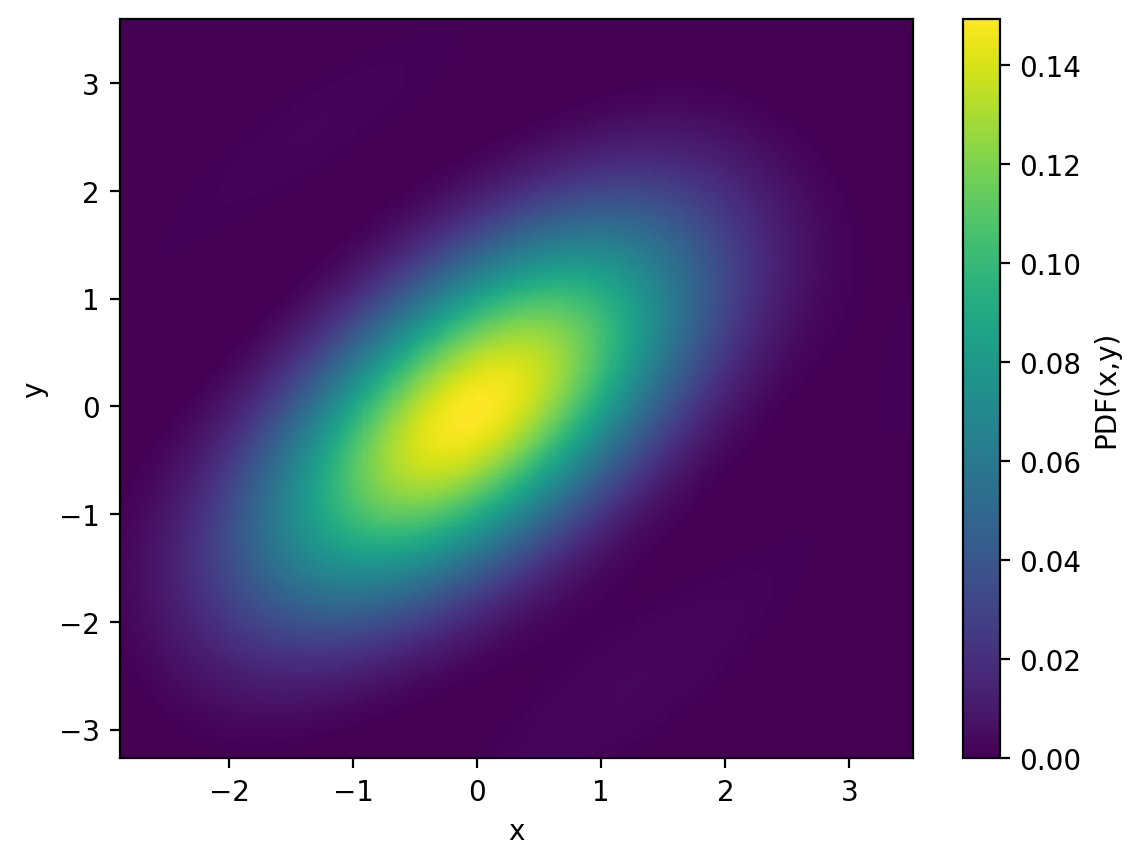

In [58]:
myPDF = fastkde.pdf(x,y,num_points=513,var_names=['x','y'])
myPDF.plot()
plt.show()

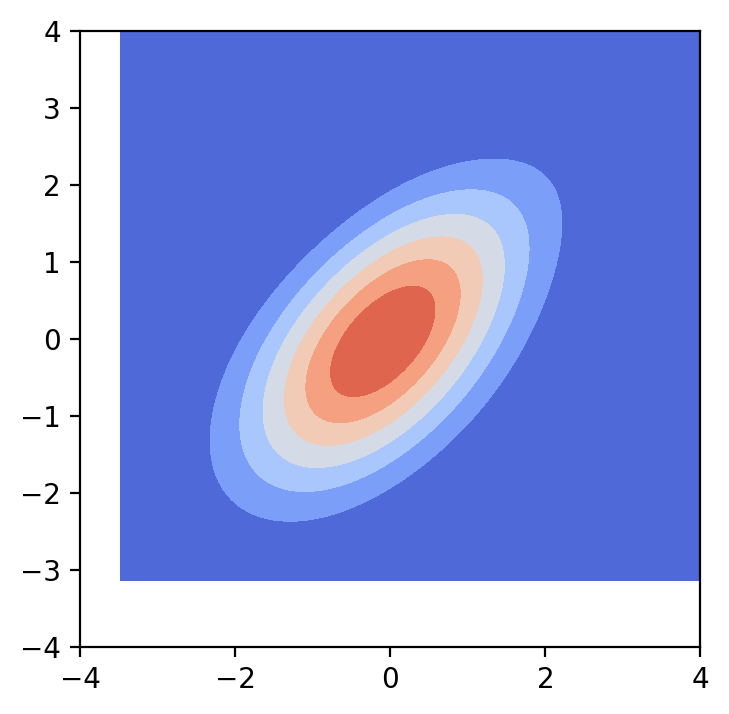

In [9]:
#Extract the axes from the axis list
v1,v2 = myPDF.x, myPDF.y

#Plot contours of the PDF should be a set of concentric ellipsoids centered on
#(0.1, -300) Comparitively, the y axis range should be tiny and the x axis range
#should be large
plt.figure(figsize=(4,4))
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.contourf(v1,v2,np.array(myPDF).reshape(len(v1),len(v2)),cmap='coolwarm',vmin=0,vmax=0.15)
#plt.contour(v1,v2,myPDF,colors='k',levels=[0.002,0.02,0.04,0.06,0.08,0.1,0.12,0.14],vmax=0.15)
plt.show()

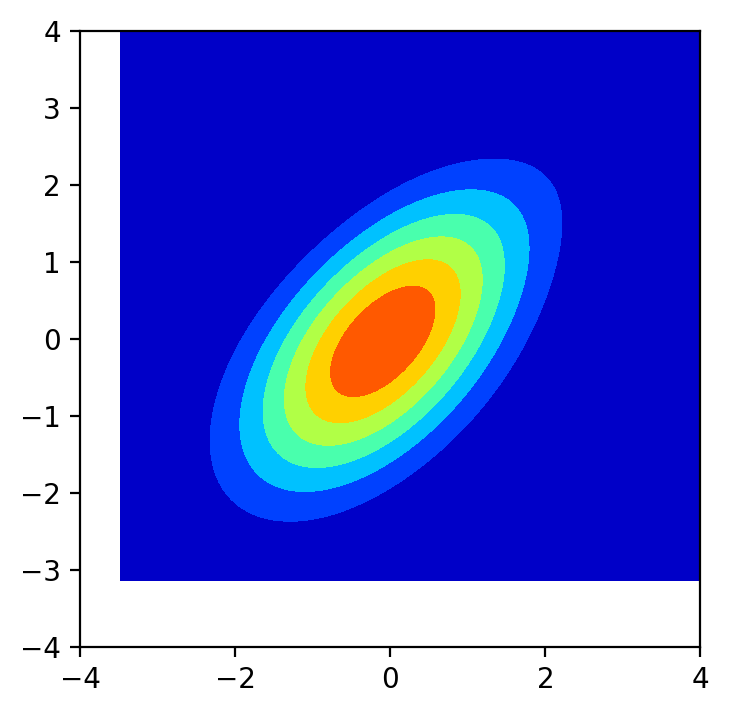

In [10]:
plt.figure(figsize=(4,4))
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.contourf(v1,v2,np.array(myPDF).reshape(len(v1),len(v2)),cmap='jet',vmin=0,vmax=0.16)
#plt.contour(v1,v2,myPDF,colors='k')
plt.show()

# Comparison with Different KDE Methods

In [11]:
dens_u = sm.nonparametric.KDEMultivariate(data=[x,y],var_type='cc', bw='normal_reference')

In [12]:
xmin = -4 #x.min()
xmax = 4 # x.max()
ymin = -4 #y.min()
ymax = 4  #y.max()
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = dens_u.pdf(positions)

In [13]:
X.shape

(100, 100)

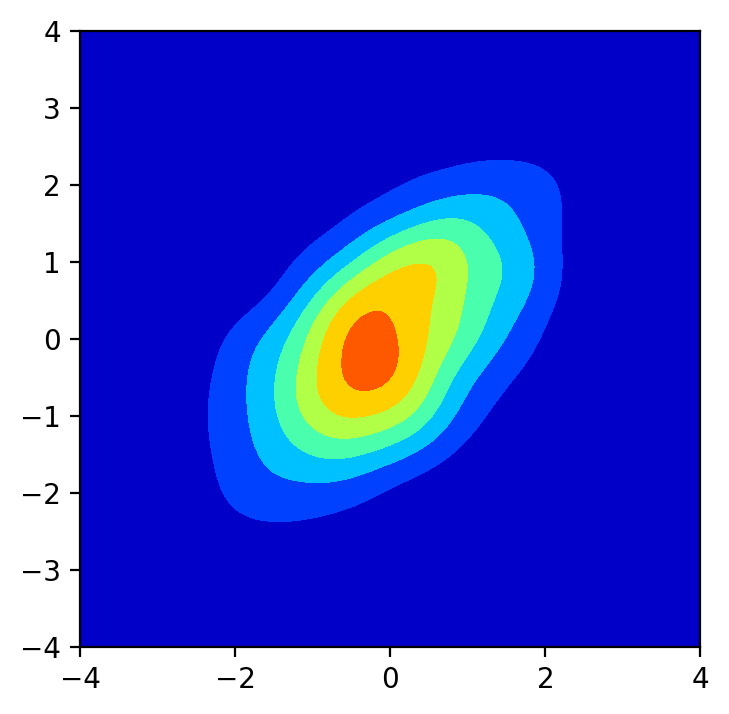

In [14]:
plt.figure(figsize=(4,4))
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.contourf(X,Y,np.reshape(Z,X.shape),cmap='jet',vmin=0,vmax=0.16)
plt.show()

In [15]:
def kde1(x, y, ax):
    from scipy.stats import gaussian_kde

    # Calculate the point density
    xy = np.vstack([x,y])
    kernel = gaussian_kde(xy) # bw_method='scott'

    xmin = x.min()
    xmax = x.max()
    ymin = y.min()
    ymax = y.max()

    X, Y = np.mgrid[xmin:xmax:257j, ymin:ymax:257j]
    positions = np.vstack([X.ravel(), Y.ravel()])

    Z = np.reshape(kernel(positions).T, X.shape)

    ax.imshow(np.rot90(Z), cmap='coolwarm',
              extent=[-4, 4, -4, 4],vmin=0,vmax=0.15)

    #ax.contour(X, Y, Z, colors='k')

def kde2(x, y, ax):
    from sklearn.neighbors import KernelDensity

    xy = np.vstack([x,y])

    d = xy.shape[0]
    n = xy.shape[1]
    bw = (n * (d + 2) / 4.)**(-1. / (d + 4)) # silverman
    #bw = n**(-1./(d+4)) # scott
    print('bw: {}'.format(bw))

    kde = KernelDensity(bandwidth=bw, metric='euclidean',
                        kernel='gaussian', algorithm='ball_tree')
    kde.fit(xy.T)

    xmin = x.min()
    xmax = x.max()
    ymin = y.min()
    ymax = y.max()


    X, Y = np.mgrid[xmin:xmax:257j, ymin:ymax:257j]
    positions = np.vstack([X.ravel(), Y.ravel()])

    Z = np.reshape(np.exp(kde.score_samples(positions.T)), X.shape)

    ax.imshow(np.rot90(Z), cmap='coolwarm',
              extent=[-4, 4, -4, 4],vmin=0,vmax=0.15)

    #ax.contour(X, Y, Z, colors='k')

def kde3(x,y,ax):
  dens_u = sm.nonparametric.KDEMultivariate(data=[x,y],var_type='cc', bw='normal_reference')
  xmin = x.min()
  xmax = x.max()
  ymin = y.min()
  ymax = y.max()

  X, Y = np.mgrid[xmin:xmax:257j, ymin:ymax:257j]
  positions = np.vstack([X.ravel(), Y.ravel()])
  Z = np.reshape(dens_u.pdf(positions),X.shape)
  ax.imshow(np.rot90(Z), cmap='coolwarm',
              extent=[-4, 4, -4, 4], vmin=0,vmax=0.15)

  #ax.contour(X, Y, Z, colors='k')

def kde4(x,y,ax):
  Z = fastkde.pdf(x,y,num_points=2**8+1,var_names=['X','Y'])
  X,Y = Z.X, Z.Y
  ax.imshow(np.rot90(np.array(Z).reshape(len(X),len(Y))), cmap='coolwarm',
              extent=[-4, 4, -4, 4],vmin=0,vmax=0.15)
  #ax.contour(X, Y, Z, colors='k')

bw: 0.31622776601683794


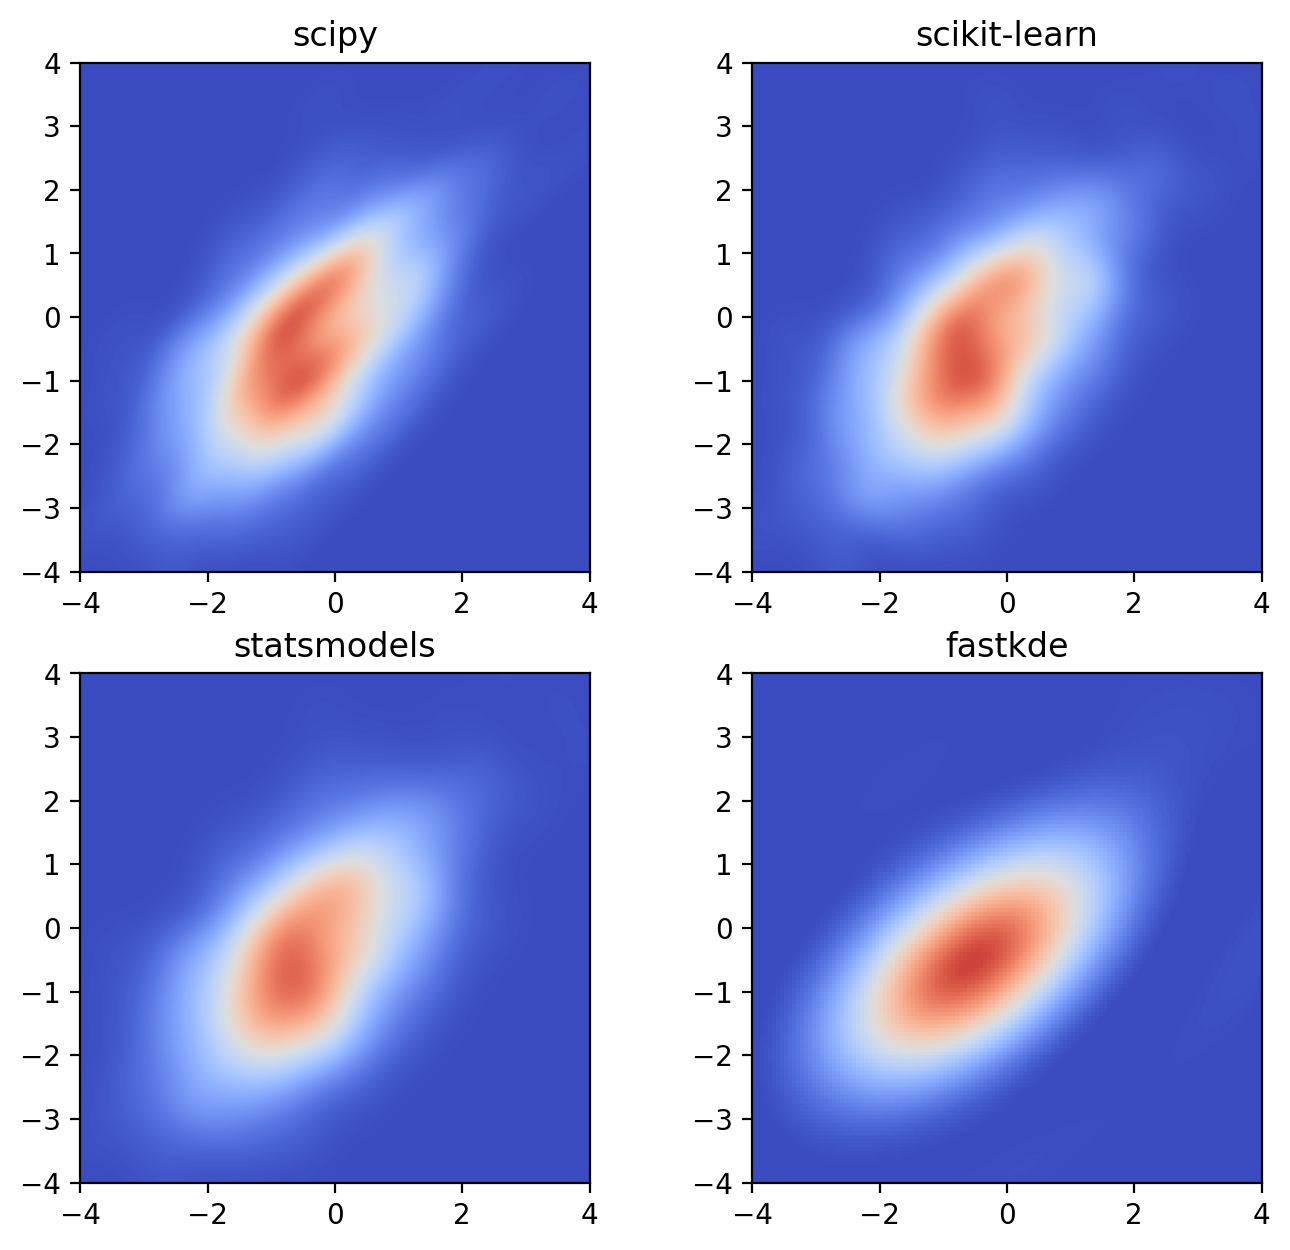

In [16]:
fig, axarr = plt.subplots(2,2,figsize=(8,8))
fig.subplots_adjust(left=0.11, right=0.95, wspace=0.0, bottom=0.18)

ax = axarr[0,0]
kde1(x, y, ax)
# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')
ax.set_title('scipy')

ax.set_xlim((-4,4))
ax.set_ylim((-4,4))

ax = axarr[0,1]
kde2(x, y, ax)
# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')
ax.set_title('scikit-learn')

ax.set_xlim((-4,4))
ax.set_ylim((-4,4))

ax = axarr[1,0]
kde3(x, y, ax)
# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')
ax.set_title('statsmodels')

ax.set_xlim((-4,4))
ax.set_ylim((-4,4))

ax = axarr[1,1]
kde4(x, y, ax)
# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')
ax.set_title('fastkde')

ax.set_xlim((-4,4))
ax.set_ylim((-4,4))

#plt.tight_layout()
plt.savefig('kde.png')
plt.show()

## The two Moons Example

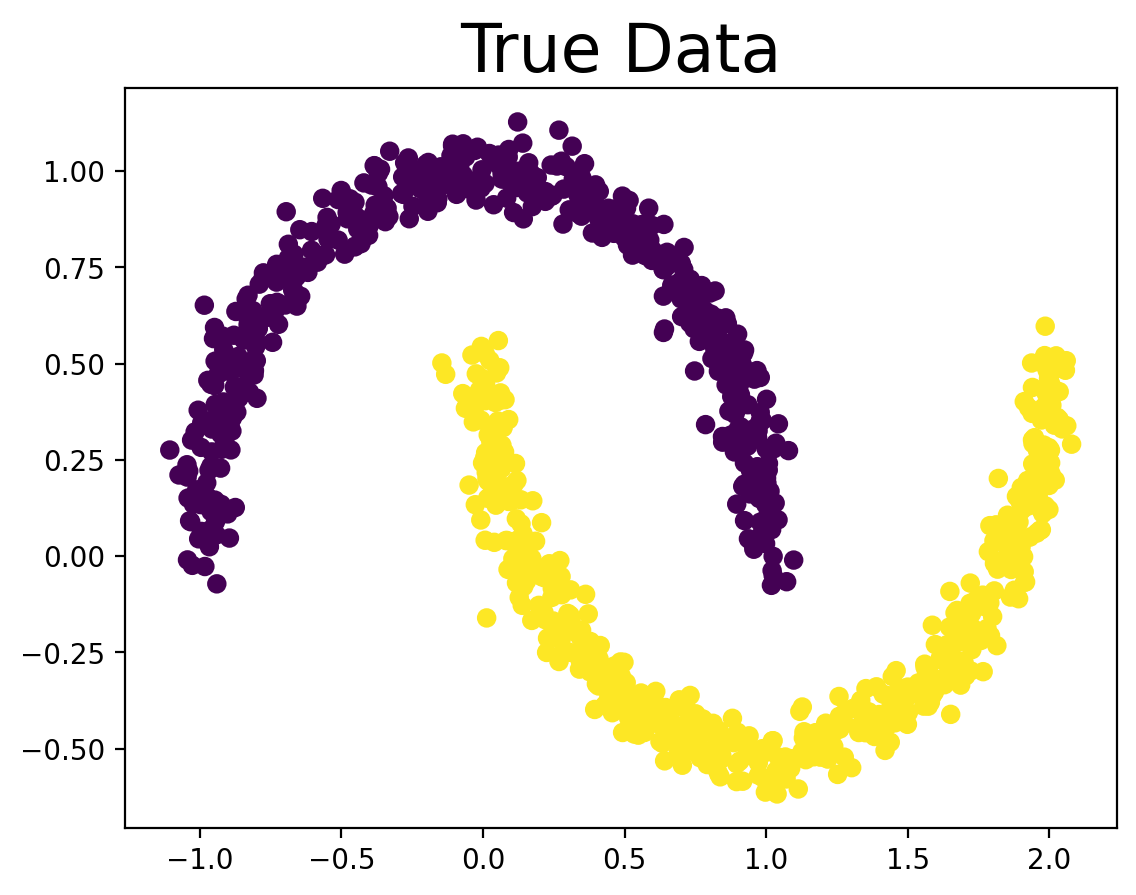

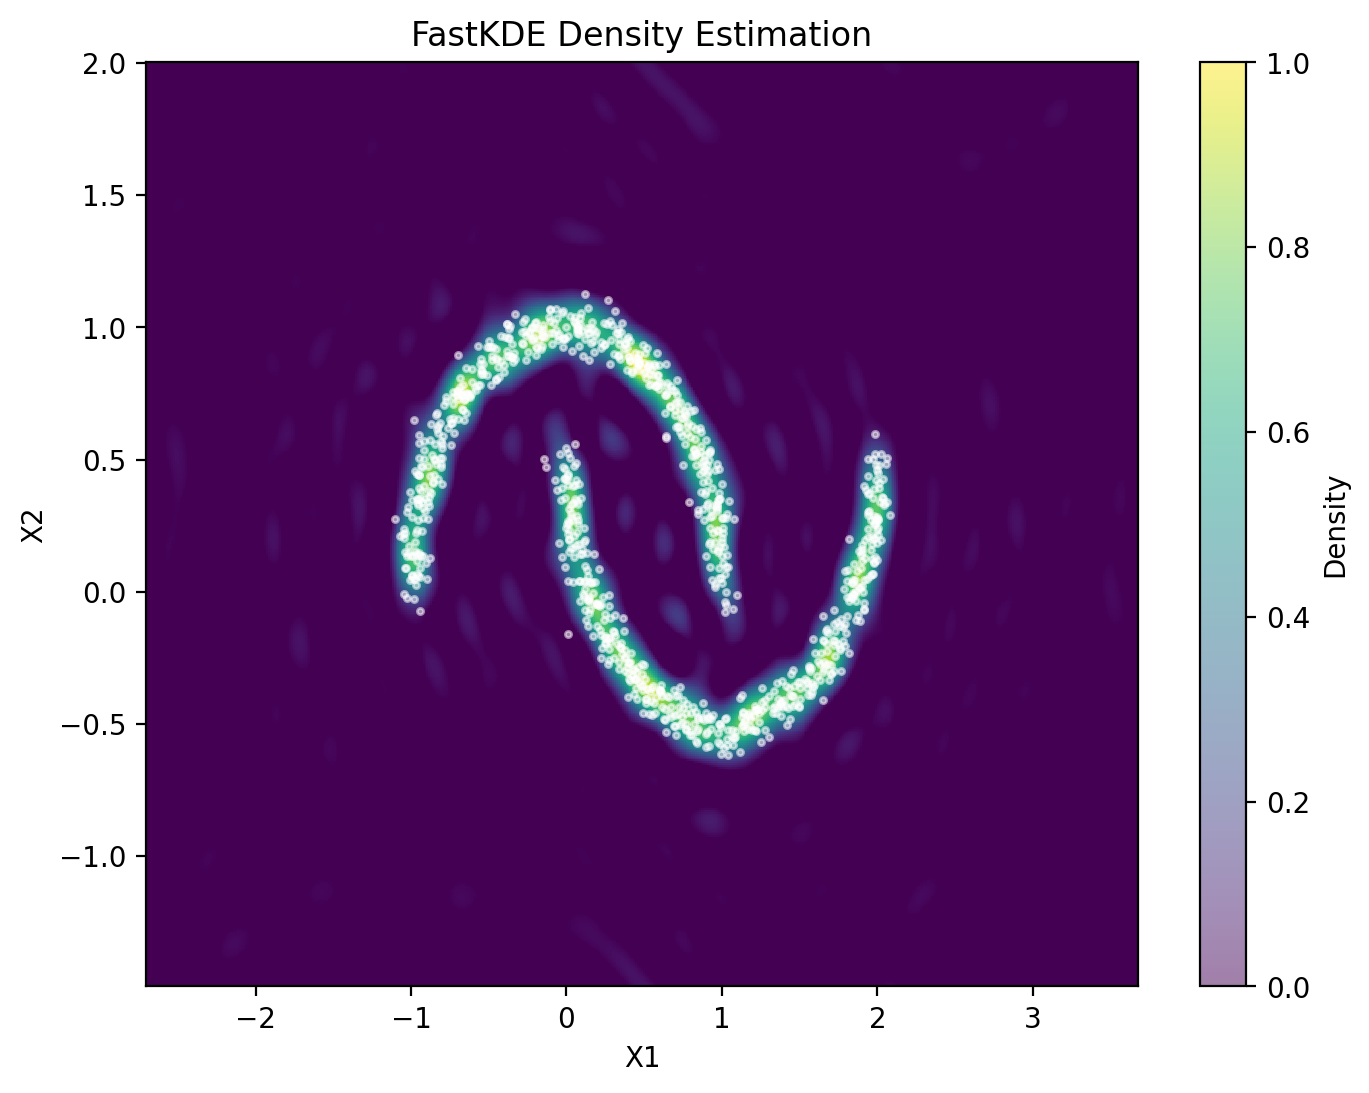

In [138]:
# Generate two moons dataset
n_samples = 1000
noise = 0.05
X, y = make_moons(n_samples=n_samples, noise=noise, random_state=123)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('True Data',fontsize=24)
plt.show()

# Initialize the KDE object with correct parameter name
kde = fastKDE.fastKDE(X.T,num_points=513)

# Get the density and axes
density = kde.pdf
axes = kde.axes

# Extract the grid axes
X1 = axes[0]
X2 = axes[1]

# Create a meshgrid for plotting
X1_grid, X2_grid = np.meshgrid(X1, X2)

# Visualize the estimated density
plt.figure(figsize=(8, 6))
plt.pcolormesh(X1_grid, X2_grid, density, shading='auto', cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c='white', s=5, alpha=0.5)
plt.title('FastKDE Density Estimation')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Density')
plt.show()

In [150]:
# Generate samples from the estimated distribution
# Get the density and axes
density = kde.pdf  # Shape: (512, 512)
axes = kde.axes
X1 = axes[0]  # Grid points along x-axis
X2 = axes[1]  # Grid points along y-axis

# Create meshgrid for plotting
X1_grid, X2_grid = np.meshgrid(X1, X2)

# Flatten the density and grids
density_flat = density.flatten()
X1_flat = X1_grid.flatten()
X2_flat = X2_grid.flatten()

# Normalize the density to create a probability mass function (PMF)
pmf = density_flat / density_flat.sum()

# Create the cumulative distribution function (CDF)
cdf = np.cumsum(pmf)

# Number of samples to generate
n_samples_to_generate = 2000

# Generate uniform random samples between 0 and 1
random_values = np.random.rand(n_samples_to_generate)

In [151]:
# Map the random values to indices in the CDF
indices = np.searchsorted(cdf, random_values)

In [152]:
# Get the corresponding samples from the grid
samples_x1 = X1_flat[indices]
samples_x2 = X2_flat[indices]

# Stack the samples into an array of shape (n_samples, 2)
samples = np.vstack((samples_x1, samples_x2)).T

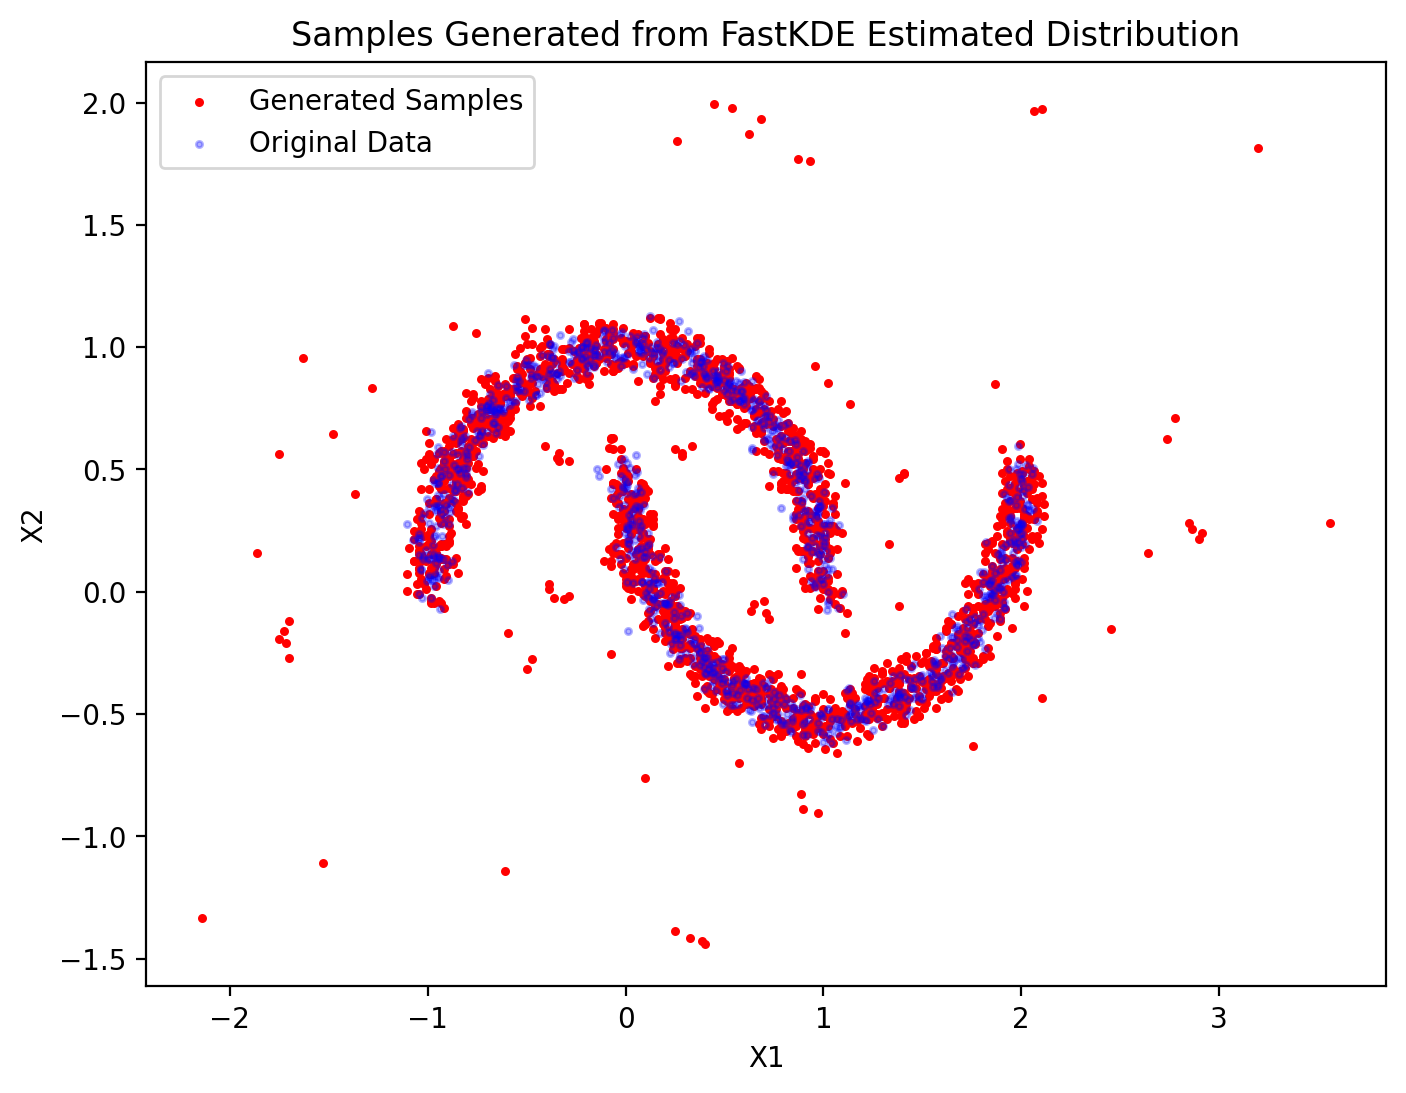

In [153]:
# Plot the generated samples along with the original data
plt.figure(figsize=(8, 6))
plt.scatter(samples[:, 0], samples[:, 1], c='red', s=5, label='Generated Samples')
plt.scatter(X[:, 0], X[:, 1], c='blue', s=5, alpha=0.3, label='Original Data')
plt.legend()
plt.title('Samples Generated from FastKDE Estimated Distribution')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### "Fix" the noise

In [166]:
# Determine the density threshold
# For example, exclude densities below the 5th percentile
density_threshold = np.percentile(density_flat[density_flat > 0], 5)
# Create a mask for densities above the threshold
mask = density_flat >= density_threshold

# Apply the mask to the density and grids
density_masked = density_flat[mask]
X1_masked = X1_flat[mask]
X2_masked = X2_flat[mask]

In [167]:
# Normalize the masked density to create a PMF
pmf = density_masked / density_masked.sum()
# Create the cumulative distribution function (CDF)
cdf = np.cumsum(pmf)

In [168]:
# Number of samples to generate
n_samples_to_generate = 1000

# Generate uniform random samples between 0 and 1
random_values = np.random.rand(n_samples_to_generate)

# Map the random values to indices in the CDF
indices = np.searchsorted(cdf, random_values)

# Get the corresponding samples from the masked grid
samples_x1 = X1_masked[indices]
samples_x2 = X2_masked[indices]

# Stack the samples into an array
samples = np.vstack((samples_x1, samples_x2)).T


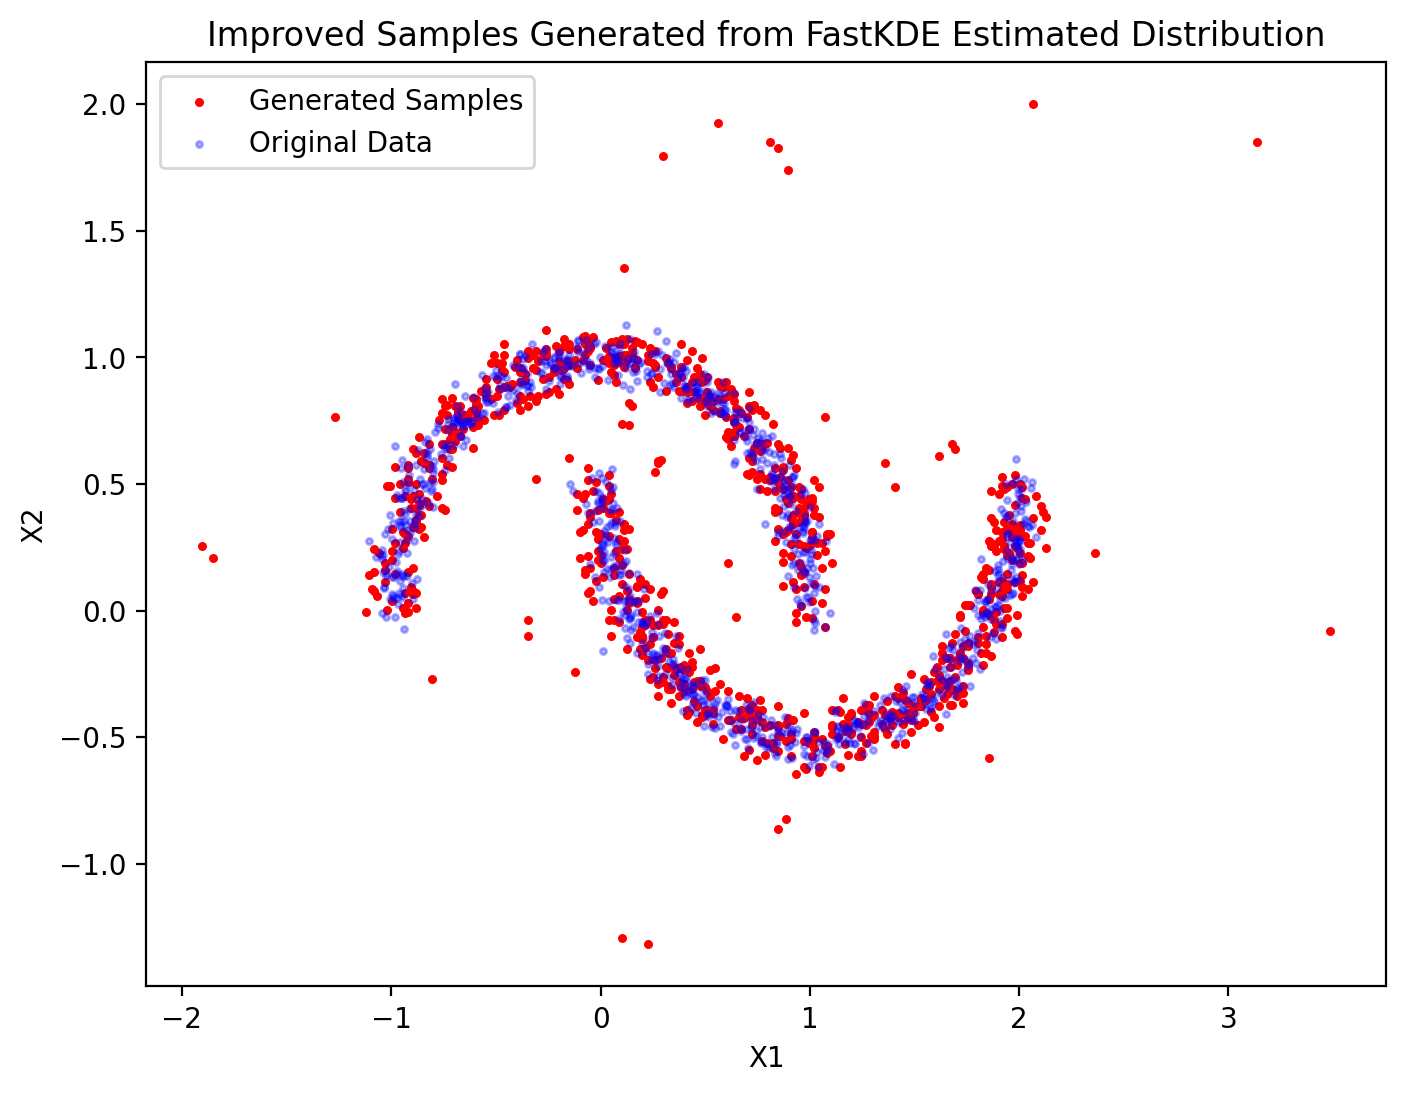

In [169]:
# Visualize the generated samples
plt.figure(figsize=(8, 6))
plt.scatter(samples[:, 0], samples[:, 1], c='red', s=5, label='Generated Samples')
plt.scatter(X[:, 0], X[:, 1], c='blue', s=5, alpha=0.3, label='Original Data')
plt.legend()
plt.title('Improved Samples Generated from FastKDE Estimated Distribution')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()